# Quick Overview

Here you can find some quick examples of what you can do with segysak. For more details refer to the [examples](../examples.html).

The library is imported as *segysak* and the loaded `xarray` objects are compatible with *numpy* and *matplotlib*.

The cropped volume from the Volve field in the North Sea (made available by Equinor) is used for this example, and
all the examples and data in this documentation are available from the `examples` folder of the
[Github](https://github.com/trhallam/segysak) respository.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import pathlib

In [3]:
V3D_path = pathlib.Path("data/volve10r12-full-twt-sub3d.sgy")
print("3D", V3D_path, V3D_path.exists())

3D data/volve10r12-full-twt-sub3d.sgy True


## Scan SEG-Y headers


A basic operation would be to check the text header included in the SEG-Y file. The *get_segy_texthead*
function accounts for common encoding issues and returns the header as a text string.

In [4]:
from segysak.segy import get_segy_texthead

get_segy_texthead(V3D_path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

If you need to investigate the trace header data more deeply, then *segy_header_scan* can be used to report
basic statistics of each byte position for a limited number of traces.

*segy_header_scan* returns a `pandas.DataFrame`. To see the full DataFrame use the `pandas` option_context manager.

In [5]:
from segysak.segy import segy_header_scan

scan = segy_header_scan(V3D_path)
scan

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

100%|██████████| 1.00k/1.00k [00:00<00:00, 11.3k traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
TRACE_SEQUENCE_FILE,5,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
FieldRecord,9,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
TraceNumber,13,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
EnergySourcePoint,17,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0


The header report can also be reduced by filtering blank byte locations. Here we use the standard deviation `std`
to filter away blank values which can help us to understand the composition of the data.

For instance, key values like **trace UTM coordinates** are located in bytes *73* for X & *77* for Y. We
can also see the byte positions of the **local grid** for INLINE_3D in byte *189* and for CROSSLINE_3D in byte *193*.

In [6]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
FieldRecord,9,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
TraceNumber,13,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
CDP,21,1000.0,2.249540e+03,57.831072,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
SourceX,73,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
SourceY,77,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
CDP_X,181,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
CDP_Y,185,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
INLINE_3D,189,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0


To retreive the raw header content use `segy_header_scrape`. Setting `partial_scan=None` will return the
full dataframe of trace header information.

In [7]:
from segysak.segy import segy_header_scrape

scrape = segy_header_scrape(V3D_path, partial_scan=1000)
scrape

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

100%|██████████| 1.00k/1.00k [00:00<00:00, 11.4k traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,10090,10090,1,0,2150,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10090,10090,2,0,2151,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10090,10090,3,0,2152,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10090,10090,4,0,2153,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10090,10090,5,0,2154,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,188,10094,10094,188,0,2337,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,189,10094,10094,189,0,2338,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
997,190,10094,10094,190,0,2339,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
998,191,10094,10094,191,0,2340,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load SEG-Y data

All SEG-Y (2D, 2D gathers, 3D & 3D gathers) are ingested into `xarray.Dataset` objects through the
`segy_loader` function. It is best to be explicit about the byte locations of key information but
`segy_loader` can attempt to guess the shape of your dataset. Some standard byte positions are
defined in the `well_known_bytes` function and others can be added via pull requests to the Github
repository if desired.

In [8]:
from segysak.segy import segy_loader, well_known_byte_locs

V3D = segy_loader(V3D_path, iline=189, xline=193, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

100%|██████████| 12.3k/12.3k [00:01<00:00, 11.4k traces/s]

100%|██████████| 12.3k/12.3k [00:01<00:00, 11.4k traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Converting SEGY:   2%|▏         | 305/12.3k [00:00<00:03, 3.05k traces/s]

Converting SEGY:   5%|▌         | 672/12.3k [00:00<00:03, 3.40k traces/s]

Converting SEGY:   9%|▊         | 1.06k/12.3k [00:00<00:03, 3.63k traces/s]

Converting SEGY:  12%|█▏        | 1.46k/12.3k [00:00<00:02, 3.77k traces/s]

Converting SEGY:  15%|█▌        | 1.85k/12.3k [00:00<00:02, 3.82k traces/s]

Converting SEGY:  18%|█▊        | 2.24k/12.3k [00:00<00:02, 3.82k traces/s]

Converting SEGY:  21%|██▏       | 2.63k/12.3k [00:00<00:02, 3.85k traces/s]

Converting SEGY:  24%|██▍       | 3.02k/12.3k [00:00<00:02, 3.87k traces/s]

Converting SEGY:  28%|██▊       | 3.41k/12.3k [00:00<00:02, 3.89k traces/s]

Converting SEGY:  31%|███       | 3.81k/12.3k [00:01<00:02, 3.90k traces/s]

Converting SEGY:  34%|███▍      | 4.20k/12.3k [00:01<00:02, 3.92k traces/s]

Converting SEGY:  37%|███▋      | 4.59k/12.3k [00:01<00:01, 3.91k traces/s]

Converting SEGY:  40%|████      | 4.99k/12.3k [00:01<00:01, 3.91k traces/s]

Converting SEGY:  44%|████▎     | 5.38k/12.3k [00:01<00:01, 3.91k traces/s]

Converting SEGY:  47%|████▋     | 5.77k/12.3k [00:01<00:01, 3.91k traces/s]

Converting SEGY:  50%|████▉     | 6.16k/12.3k [00:01<00:01, 3.90k traces/s]

Converting SEGY:  53%|█████▎    | 6.55k/12.3k [00:01<00:01, 3.90k traces/s]

Converting SEGY:  56%|█████▋    | 6.94k/12.3k [00:01<00:01, 3.87k traces/s]

Converting SEGY:  59%|█████▉    | 7.33k/12.3k [00:01<00:01, 3.87k traces/s]

Converting SEGY:  63%|██████▎   | 7.71k/12.3k [00:02<00:01, 3.87k traces/s]

Converting SEGY:  66%|██████▌   | 8.11k/12.3k [00:02<00:01, 3.88k traces/s]

Converting SEGY:  69%|██████▉   | 8.49k/12.3k [00:02<00:00, 3.88k traces/s]

Converting SEGY:  72%|███████▏  | 8.88k/12.3k [00:02<00:00, 3.88k traces/s]

Converting SEGY:  75%|███████▌  | 9.27k/12.3k [00:02<00:00, 3.89k traces/s]

Converting SEGY:  78%|███████▊  | 9.66k/12.3k [00:02<00:00, 3.88k traces/s]

Converting SEGY:  82%|████████▏ | 10.1k/12.3k [00:02<00:00, 3.91k traces/s]

Converting SEGY:  85%|████████▍ | 10.5k/12.3k [00:02<00:00, 3.92k traces/s]

Converting SEGY:  88%|████████▊ | 10.8k/12.3k [00:02<00:00, 3.91k traces/s]

Converting SEGY:  91%|█████████ | 11.2k/12.3k [00:02<00:00, 3.92k traces/s]

Converting SEGY:  94%|█████████▍| 11.6k/12.3k [00:03<00:00, 3.91k traces/s]

Converting SEGY:  98%|█████████▊| 12.0k/12.3k [00:03<00:00, 3.90k traces/s]

Converting SEGY: 100%|██████████| 12.3k/12.3k [00:03<00:00, 3.87k traces/s]

<xarray.Dataset>
Dimensions:  (iline: 61, xline: 202, twt: 850)
Coordinates:
  * iline    (iline) uint16 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.595060190682801, -6.114936243337226, -1.50399996...
    coord_scalar:        -100.0

## Visualising data

`xarray` objects use smart label based indexing techniques to retreive subsets of data. More
details on `xarray` techniques for *segysak* are covered in the examples, but this demonstrates
a general syntax for selecting data by label with `xarray`. Plotting is done by `matploblib` and
`xarray` selections can be passed to normal `matplotlib.pyplot` functions.

Text(0.5, 0, 'XLINE')

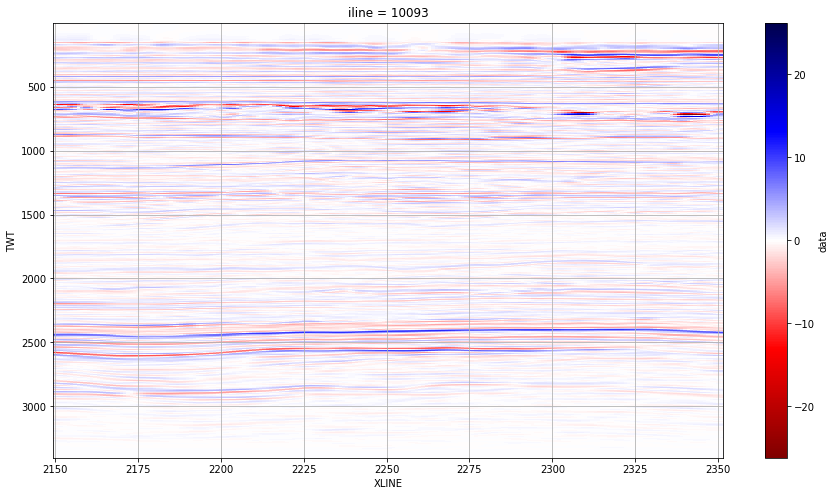

In [9]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 10093
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

## Saving data to NetCDF4

SEGYSAK offers a convenience utility to make saving to NetCDF4 simple. This is accesssed through the `seisio` accessor on the loaded
SEG-Y or SEISNC volume. The `to_netcdf` method accepts the same arguments as the `xarray` version.

In [10]:
V3D.seisio.to_netcdf("V3D.SEISNC")

## Saving data to SEG-Y

To return data to SEG-Y after modification use the `segy_writer` function. `segy_writer` takes as argument a SEISNC dataset which
requires certain attributes be set. You can also specify the byte locations to write header information.

In [11]:
from segysak.segy import segy_writer

segy_writer(
    V3D, "V3D.segy", trace_header_map=dict(iline=5, xline=21)
)  # Petrel Locations

Writing to SEG-Y:   0%|          | 0/12322 [00:00<?, ? traces/s]

Writing to SEG-Y:  20%|█▉        | 2424/12322 [00:00<00:00, 23251.22 traces/s]

Writing to SEG-Y:  43%|████▎     | 5252/12322 [00:00<00:00, 25572.66 traces/s]

Writing to SEG-Y:  64%|██████▍   | 7878/12322 [00:00<00:00, 25874.95 traces/s]

Writing to SEG-Y:  87%|████████▋ | 10706/12322 [00:00<00:00, 26334.79 traces/s]

Writing to SEG-Y: 100%|██████████| 12322/12322 [00:00<00:00, 26033.52 traces/s]